## Divyam Gupta
### TSF Task - 2 , Data Science and Business Analytics
### Prediction using Unsupervised ML

#### Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Dataset

In [2]:
# Reading the dataset
df = pd.read_csv('./Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Visualisation

In [5]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid',)
sns.set_palette('Accent_r')

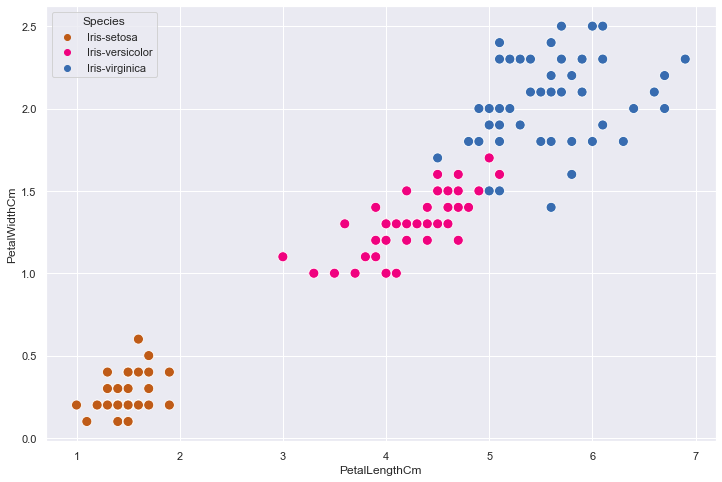

In [6]:
sns.scatterplot(x = df['PetalLengthCm'],y = df['PetalWidthCm'],hue = df['Species'],s =100)
plt.show()

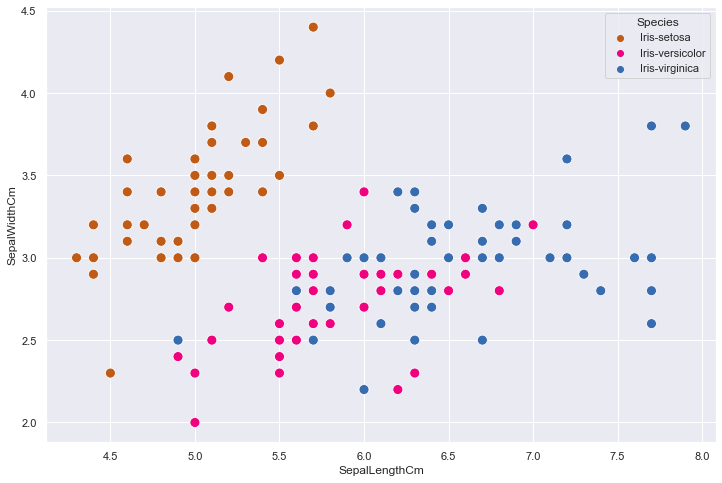

In [7]:
sns.scatterplot(x = df['SepalLengthCm'],y = df['SepalWidthCm'],hue = df['Species'],s = 100)
plt.show()

#### Creating Model

In [8]:
from sklearn.cluster import KMeans

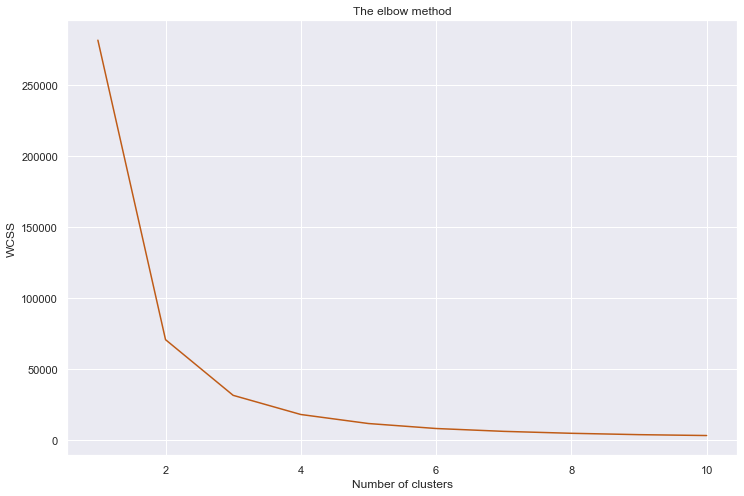

In [9]:
# Finding the optimum number of clusters for k-means classification

X = df.drop('Species',axis=1)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 101)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
sns.lineplot(x = range(1, 11),y = wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, random_state = 101)
y_kmeans = kmeans.fit_predict(X)

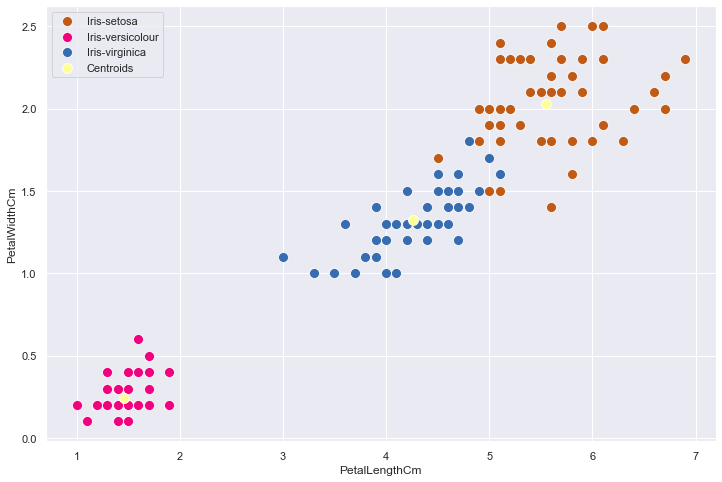

In [11]:
# Visualising the clusters - On the two columns
sns.scatterplot(x = X[y_kmeans == 0]['PetalLengthCm'],y = X[y_kmeans == 0]['PetalWidthCm'], 
            s = 100, label = 'Iris-setosa')
sns.scatterplot(x = X[y_kmeans == 1]['PetalLengthCm'],y = X[y_kmeans == 1]['PetalWidthCm'], 
            s = 100, label = 'Iris-versicolour')
sns.scatterplot(x = X[y_kmeans == 2]['PetalLengthCm'],y = X[y_kmeans == 2]['PetalWidthCm'],
            s = 100, label = 'Iris-virginica')

# Plotting the centroids of the clusters
sns.scatterplot(x = kmeans.cluster_centers_[:, 3],y = kmeans.cluster_centers_[:,4], 
            s = 100, label = 'Centroids')

plt.show()